# **Analysis on the different causes of deaths per year (2010-2022).**

## Section 1: Introduction

#### **Interest in the Dataset**
I find this dataset on causes of death quite interesting as it provides valuable information about mortality patterns across different age groups and genders. Understanding the leading causes of death can shed light on public health priorities, disease prevention strategies, and healthcare resource allocation. Analyzing this dataset can help identify trends, disparities, and potential areas for intervention to improve population health outcomes.

#### **Description of Dataset**
The dataset titled "CausesOfDeathDataset.csv" consists of information on causes of death, categorized by year, age groups, and gender. It includes data for both males and females across various age brackets, starting from under 1 year old to 85 years and over. The causes of death are specified, such as certain infectious and parasitic diseases, tuberculosis, meningococcal infection, viral hepatitis, HIV disease, neoplasms (including malignant neoplasms), and more.

The dataset provides a comprehensive overview of mortality patterns for different causes of death over the years from 2010 to 2022. The number of deaths is reported for each age group and gender, allowing for a detailed analysis of mortality rates and distributions across different population segments.

#### **Brainstorming questions**
* What are the trends in causes of death over the years for different age groups and genders?
* What are the top three causes of death across all years and genders?
* Are there any gender disparities in mortality rates for specific causes of death?
* Can we identify any significant trends or patterns in the causes of death based on gender and age groups over the years?
* Is there any correlation between the number of deaths for different age groups and genders?

## Section 2: Data wrangling

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pprint import pprint
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

In [340]:
#Loading the dataset
data = pd.read_csv("../data/CausesOfDeathDataset.csv")
data.head()

,Causes of death,Year,under 1 year_Male,1 to under 15 years_Male,15 to under 20 years_Male,20 to under 25 years_Male,25 to under 30 years_Male,30 to under 35 years_Male,35 to under 40 years_Male,40 to under 45 years_Male,...,40 to under 45 years_Female,45 to under 50 years_Female,50 to under 55 years_Female,55 to under 60 years_Female,60 to under 65 years_Female,65 to under 70 years_Female,70 to under 75 years_Female,75 to under 80 years_Female,80 to under 85 years_Female,85 years and over_Female
0,Certain infectious and parasitic diseases,2010,19,27,13,5,23,33,77,154,...,52,97,143,155,228,394,672,1122,1802,3418
1,"Tuberculosis, including its sequelae",2010,-,-,-,-,-,2,5,7,...,1,2,3,2,2,5,11,29,25,40
2,Meningococcal infection,2010,-,6,4,-,1,-,-,3,...,-,2,-,-,-,2,2,-,-,1
3,Viral hepatitis,2010,-,-,-,-,3,3,13,29,...,9,17,31,21,23,32,58,68,118,99
4,HIV disease,2010,-,1,-,-,10,15,34,54,...,14,12,7,4,2,5,4,2,-,-


In [341]:
#Preprocess the data
data = data.replace("-", np.nan)
data = data.replace(".", np.nan)

In [342]:
data.head()

,Causes of death,Year,under 1 year_Male,1 to under 15 years_Male,15 to under 20 years_Male,20 to under 25 years_Male,25 to under 30 years_Male,30 to under 35 years_Male,35 to under 40 years_Male,40 to under 45 years_Male,...,40 to under 45 years_Female,45 to under 50 years_Female,50 to under 55 years_Female,55 to under 60 years_Female,60 to under 65 years_Female,65 to under 70 years_Female,70 to under 75 years_Female,75 to under 80 years_Female,80 to under 85 years_Female,85 years and over_Female
0,Certain infectious and parasitic diseases,2010,19,27,13,5,23,33,77,154,...,52,97,143,155,228,394,672,1122,1802,3418
1,"Tuberculosis, including its sequelae",2010,NaN,NaN,NaN,NaN,NaN,2,5,7,...,1,2,3,2,2,5,11,29,25,40
2,Meningococcal infection,2010,NaN,6,4,NaN,1,NaN,NaN,3,...,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,1
3,Viral hepatitis,2010,NaN,NaN,NaN,NaN,3,3,13,29,...,9,17,31,21,23,32,58,68,118,99
4,HIV disease,2010,NaN,1,NaN,NaN,10,15,34,54,...,14,12,7,4,2,5,4,2,NaN,NaN


In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Causes of death              1066 non-null   object
 1   Year                         1066 non-null   int64 
 2   under 1 year_Male            446 non-null    object
 3   1 to under 15 years_Male     621 non-null    object
 4   15 to under 20 years_Male    600 non-null    object
 5   20 to under 25 years_Male    760 non-null    object
 6   25 to under 30 years_Male    837 non-null    object
 7   30 to under 35 years_Male    885 non-null    object
 8   35 to under 40 years_Male    910 non-null    object
 9   40 to under 45 years_Male    943 non-null    object
 10  45 to under 50 years_Male    956 non-null    object
 11  50 to under 55 years_Male    962 non-null    object
 12  55 to under 60 years_Male    966 non-null    object
 13  60 to under 65 years_Male    963 

As we can see the age groups above are shown as type objects. This needs to be converted into Integers to perform computations.

In [344]:
# Function to return all gender age groups
def get_age_groups(data, gender_wise=False):

    """
    This function takes in the dataframe and returns the list of required columns

    data: The dataframe
    gender_wise: True -> returns separate lists for male and female, False -> single list containing all the age groups.
    """

    unwanted_columns = ["Causes of death", "Year"]
    if gender_wise==True:
        male_age_groups = list(data.filter(regex='_Male').columns)
        female_age_groups = list(data.filter(regex='_Female').columns)
        return male_age_groups, female_age_groups
    else:  
        all_gender_age_group = [column for column in data.columns if column not in unwanted_columns]
        return all_gender_age_group

In [345]:
all_gender_age_group = get_age_groups(data)
data[all_gender_age_group] = data[all_gender_age_group].astype(float)

In [346]:
males, females = get_age_groups(data, gender_wise=True)

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Causes of death              1066 non-null   object 
 1   Year                         1066 non-null   int64  
 2   under 1 year_Male            446 non-null    float64
 3   1 to under 15 years_Male     621 non-null    float64
 4   15 to under 20 years_Male    600 non-null    float64
 5   20 to under 25 years_Male    760 non-null    float64
 6   25 to under 30 years_Male    837 non-null    float64
 7   30 to under 35 years_Male    885 non-null    float64
 8   35 to under 40 years_Male    910 non-null    float64
 9   40 to under 45 years_Male    943 non-null    float64
 10  45 to under 50 years_Male    956 non-null    float64
 11  50 to under 55 years_Male    962 non-null    float64
 12  55 to under 60 years_Male    966 non-null    float64
 13  60 to under 65 yea

## Section 3: Data visualization and initial analysis

The data has so many rows and columns, therefore in order to visualize the data properly. We need to minimize the dataset to 10 causes of death. Therefore, I am extracting the top 10 causes of death.

[]

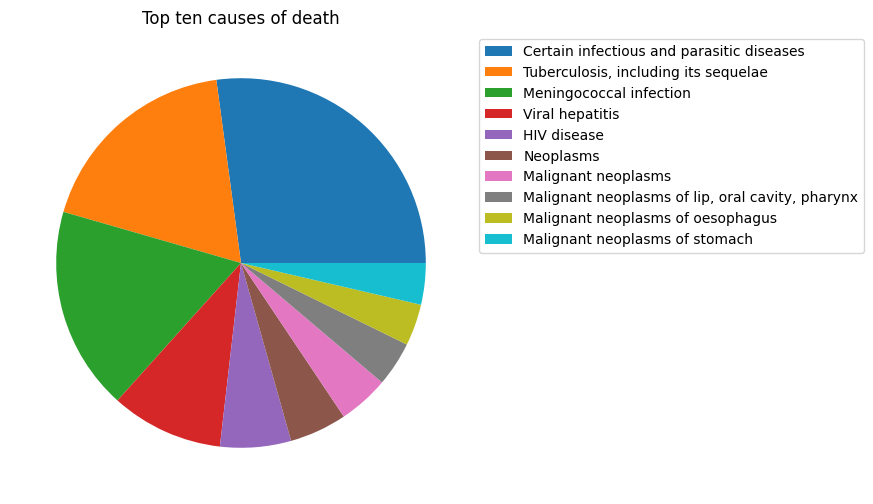

In [348]:
males, females = get_age_groups(data, gender_wise=True)
causes_of_death_grouped = data[data['Causes of death']!="Total"].groupby(['Causes of death'])[males+females].sum()
top_ten_causes = causes_of_death_grouped.sum(axis=1).sort_values(axis=0, ascending=False)[:10]

plt.title("Top ten causes of death")
plt.pie(top_ten_causes[:10])
plt.legend(data['Causes of death'] , bbox_to_anchor=(1.0, 1.0))
plt.plot()

In [349]:
# This function takes in the dataframe and returns the dataframe of top ten causes of death.

def get_top_ten_causes_data(data):

    """
    This function takes in the dataframe and returns a new dataframe containing records against the top ten causes of death.

    data: pandas dataframe
    """

    males, females = get_age_groups(data, gender_wise=True)
    causes_of_death_grouped = data[data['Causes of death']!="Total"].groupby(['Causes of death'])[males+females].sum()
    top_ten_causes = causes_of_death_grouped.sum(axis=1)
    top_ten_causes = top_ten_causes.sort_values(axis=0, ascending=False)[:10].index
    return data[data['Causes of death'].isin(top_ten_causes)], top_ten_causes 

In [350]:
data, causes = get_top_ten_causes_data(data)
data.head()

,Causes of death,Year,under 1 year_Male,1 to under 15 years_Male,15 to under 20 years_Male,20 to under 25 years_Male,25 to under 30 years_Male,30 to under 35 years_Male,35 to under 40 years_Male,40 to under 45 years_Male,...,40 to under 45 years_Female,45 to under 50 years_Female,50 to under 55 years_Female,55 to under 60 years_Female,60 to under 65 years_Female,65 to under 70 years_Female,70 to under 75 years_Female,75 to under 80 years_Female,80 to under 85 years_Female,85 years and over_Female
5,Neoplasms,2010,16.0,114.0,82.0,115.0,164.0,258.0,458.0,1065.0,...,1357.0,2703.0,4235.0,5883.0,7426.0,10815.0,15352.0,15246.0,17184.0,22672.0
6,Malignant neoplasms,2010,11.0,106.0,80.0,111.0,158.0,248.0,447.0,1050.0,...,1334.0,2680.0,4196.0,5838.0,7343.0,10658.0,15047.0,14811.0,16457.0,21138.0
15,"Malig. neoplasms of larynx,trachea,bronchus,lung",2010,3.0,NaN,3.0,4.0,8.0,12.0,55.0,170.0,...,162.0,433.0,928.0,1310.0,1622.0,1979.0,2130.0,1905.0,1769.0,1509.0
33,Mental and behavioural disorders,2010,NaN,1.0,8.0,36.0,102.0,160.0,208.0,344.0,...,88.0,143.0,189.0,185.0,199.0,294.0,531.0,1009.0,2400.0,9547.0
38,Diseases of the circulatory system,2010,11.0,44.0,39.0,76.0,115.0,171.0,398.0,1123.0,...,430.0,812.0,1241.0,1826.0,2557.0,4910.0,11669.0,20432.0,39779.0,119081.0


Now, our data is ready to be used for further analysis.

## Section 4: Exploratory Data Analysis

### Question 1: What are the trends in causes of death over the years for different age groups and genders?

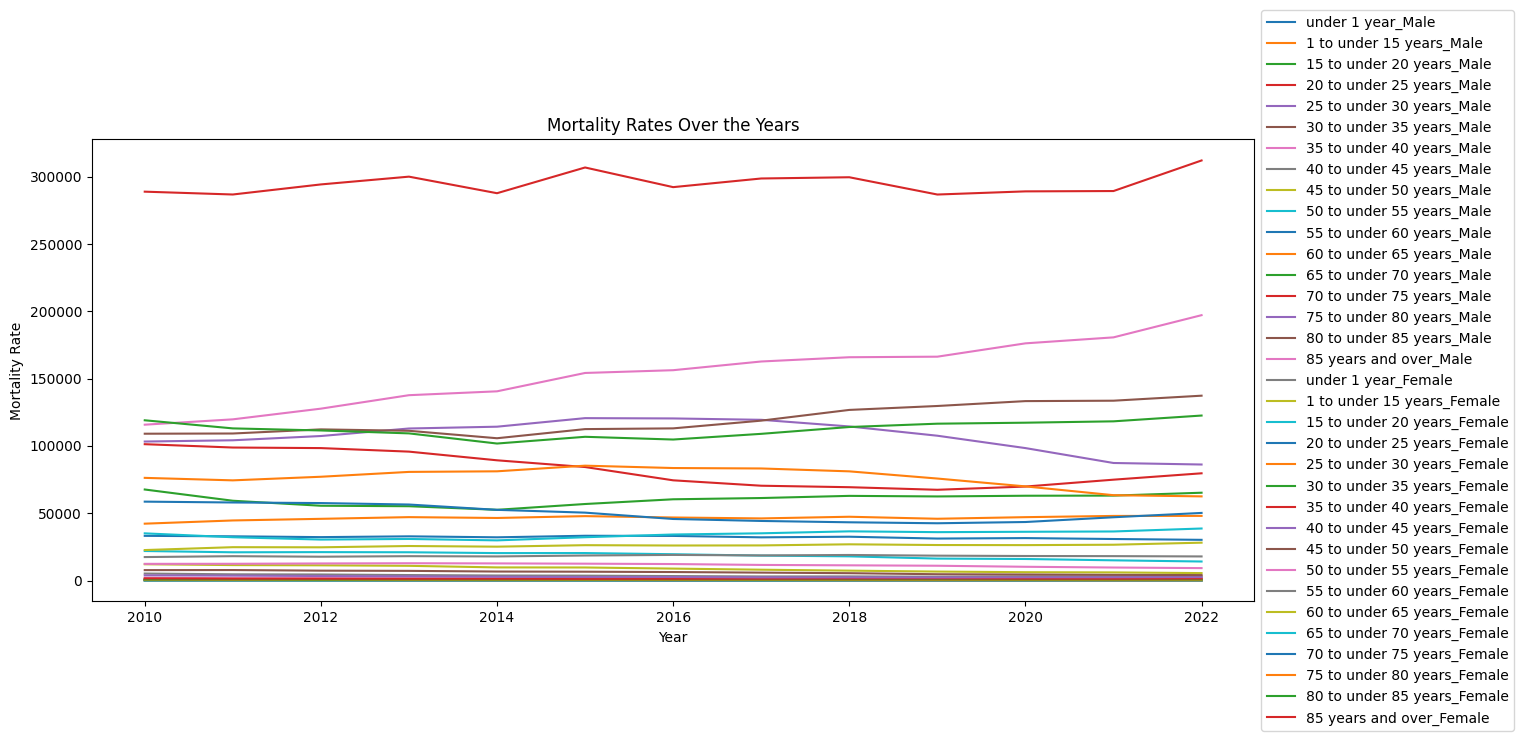

In [351]:
# # Age wise morality rates
grouped_data = data.groupby('Year').sum()
grouped_data.plot(kind='line', figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rates Over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

**Key Observations**
1. The graph displays the mortality rate per year for different age groups.
2. The age group 85 and above exhibits the highest number of deaths for both males and females.
3. Surprisingly, within the 85 and above age group, the death rate for females is significantly higher than that of males.
4. Some age groups, such as "25 and under," demonstrate a declining trend in the graph, indicating that the mortality rate for this age group is decreasing over time.
5. In general, the graph illustrates an upward trend in mortality rates as time progresses.


In [352]:
# Morality rates per Causes over the years
def generate_plots_morality_rates_per_cause(df, causes=None, groups=None):

    # Grouping the data by 'Year' and 'Causes of death'
    grouped = df.groupby(['Year', 'Causes of death']).sum().reset_index()

    # Number of causes of death
    num_causes = len(causes)

    # Create subplots
    fig, axes = plt.subplots(num_causes, 1, figsize=(10, 5*num_causes), sharex=True)

    # Plotting mortality rates for each cause of death
    for i, cause in enumerate(causes):
        cause_data = grouped[grouped['Causes of death'] == cause]
        axes[i].plot(cause_data['Year'], cause_data[groups], label=groups)
        axes[i].set_title(cause)
        axes[i].legend()

    # # Adding a common legend
    # fig.legend(loc='upper right')

    # Adding common x-axis label
    fig.text(0.5, 0.04, 'Year', ha='center', fontsize=14)

    # Adding common y-axis label
    fig.text(0.04, 0.5, 'Number of Deaths', va='center', rotation='vertical', fontsize=14)

    plt.tight_layout()
    plt.show()

In [353]:
# Get all age groups
male_age_groups, female_age_groups = get_age_groups(data, gender_wise=True)

# Group the data by Year and Causes_Of_Death, summing up the death counts
grouped_data = data.groupby(['Year', 'Causes of death']).sum().reset_index()

# Get unique causes of death
causes = data['Causes of death'].unique()

# generate_plots_morality_rates_per_cause(data, causes, male_age_groups)

In [354]:
# data.groupby(['Causes of death']).sum().drop(["Year"], axis=1)
male_groups, female_groups = get_age_groups(data, gender_wise=True)
male_groups.insert(0,"Year")
female_groups.insert(0, "Year")
male_df = data[male_groups]
female_df = data[female_groups]

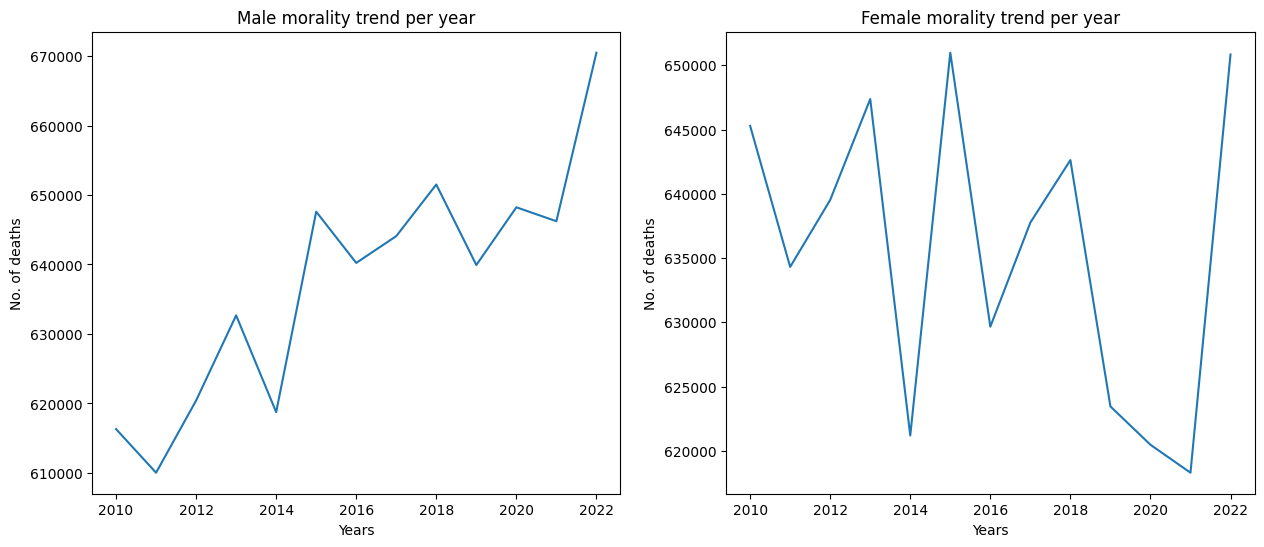

In [355]:
plt.subplot(1,2,1)
plt.title("Male morality trend per year")
plt.xlabel("Years")
plt.ylabel("No. of deaths")
plt.plot(male_df.groupby(['Year']).sum().sum(axis=1))

plt.subplot(1,2,2)
plt.title("Female morality trend per year")
plt.xlabel("Years")
plt.ylabel("No. of deaths")
plt.plot(female_df.groupby(['Year']).sum().sum(axis=1))

**Key observations**
1. The graph depicts the mortality rates for males and females.
2. Among males, there is a gradual increase in the number of deaths over time, although there are some fluctuations.
3. In contrast, there is no clear seasonal pattern observed in the mortality rates for females.
4. There was a significant decrease in the mortality rate for both genders in 2014.
5. Furthermore, during the Covid pandemic, there has been an upward trend in mortality rates for both males and females.

### Question 2: What are the top three causes of death across all years and genders?

In [356]:
# Group by cause of death and calculate the sum of deaths across all years and genders
cause_of_death_totals = data.groupby('Causes of death').sum()

male_top_three_causes = {}
female_top_three_causes = {}

male_columns, female_columns = get_age_groups(data, gender_wise=True)

male_top_three_causes = {key: cause_of_death_totals.nlargest(4, key).index.tolist()[1:] for key in male_columns}

pprint(male_top_three_causes, width = 230)

{'1 to under 15 years_Male': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Diseases of the respiratory system'],
 '15 to under 20 years_Male': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Other forms of heart disease'],
 '20 to under 25 years_Male': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Mental and behavioural disorders'],
 '25 to under 30 years_Male': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Mental and behavioural disorders'],
 '30 to under 35 years_Male': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Mental and behavioural disorders'],
 '35 to under 40 years_Male': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Mental and behavioural disorders'],
 '40 to under 45 years_Male': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Ischaemic heart diseases'],
 '45 to under 50 years_Male': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Ischaemic heart

We can see that the top three causes of death for males across different age groups are consistently:
1. Malignant neoplasms (cancer)
2. Diseases of the circulatory system (such as heart disease)
3. Various other specific conditions, including diseases of the respiratory system, mental and behavioral disorders, and ischaemic heart diseases.

In [357]:
# Flatten the data to get all causes of death
def generate_morality_frequency_plot(data, gender):
    all_causes = [cause for age_group in data.values() for cause in age_group]

    # Count the frequency of each cause
    cause_counts = {}
    for cause in all_causes:
        if cause in cause_counts:
            cause_counts[cause] += 1
        else:
            cause_counts[cause] = 1

    # Sort the causes by frequency in descending order
    sorted_causes = sorted(cause_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract the most popular cause
    most_popular_cause = sorted_causes[0][0]

    # Plot the frequency of causes
    causes = [cause[0] for cause in sorted_causes]
    frequency = [cause[1] for cause in sorted_causes]

    plt.barh(causes, frequency)
    plt.xlabel('Frequency')
    plt.ylabel('Causes of Death')
    plt.title(f'Frequency of Causes of Death ({gender})')
    plt.show()

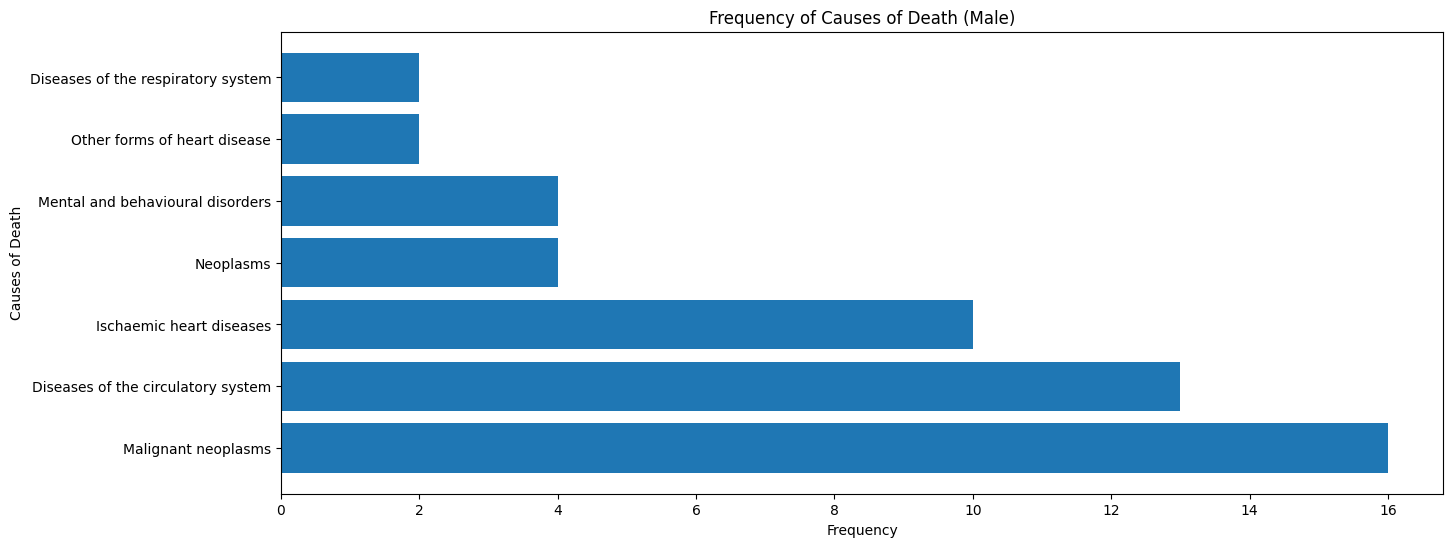

In [358]:
generate_morality_frequency_plot(male_top_three_causes, gender="Male")

**Key observations**
1. Malignant neoplasms consistently appear as one of the most frequent causes of death in males across all age groups.
2. Diseases of the circulatory system, particularly heart diseases, are also prominent causes of death in males across most age groups.
3. The frequency of deaths due to malignant neoplasms and diseases of the circulatory system generally increases with age, with a noticeable spike in the oldest age group (85 years and over).
4. Other specific conditions, such as diseases of the respiratory system, mental and behavioral disorders, and ischaemic heart diseases, are also mentioned as causes of death in males, although their frequency may vary across different age groups.
5. The frequency of deaths due to neoplasms (including both benign and malignant tumors) appears to increase in the later age groups, particularly in the age groups of 75 to under 80 years, 80 to under 85 years, and 85 years and over.
6. The graph provides a clear visual representation of the most common causes of death for males across different age groups, allowing for easy comparison and identification of trends.

In [359]:
# For Females
female_top_three_causes = {key: cause_of_death_totals.nlargest(4, key).index.tolist()[1:] for key in female_columns}
pprint(female_top_three_causes, width = 230)

{'1 to under 15 years_Female': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Diseases of the respiratory system'],
 '15 to under 20 years_Female': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Other forms of heart disease'],
 '20 to under 25 years_Female': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Diseases of the respiratory system'],
 '25 to under 30 years_Female': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Mental and behavioural disorders'],
 '30 to under 35 years_Female': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Mental and behavioural disorders'],
 '35 to under 40 years_Female': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Mental and behavioural disorders'],
 '40 to under 45 years_Female': ['Malignant neoplasms', 'Diseases of the circulatory system', 'Malig. neoplasms of larynx,trachea,bronchus,lung'],
 '45 to under 50 years_Female': ['Malignant neoplasms', 'Diseases of

**Key observations**

1. Across most age groups, malignant neoplasms (cancer) consistently appear as one of the top causes of death for females.
2. Diseases of the circulatory system (such as heart diseases) consistently feature among the leading causes of death.
3. Mental and behavioral disorders are prominent causes of death in the 25 to under 30 years age group.
4. Malig. neoplasms of larynx, trachea, and bronchus are more prevalent in the 40 to under 45 years age group.
5. Ischaemic heart diseases become more significant in the 70 to under 75 years and 75 to under 80 years age groups.
6. Diseases of the respiratory system contribute to mortality, especially in the under 1 year and 20 to under 25 years age groups.

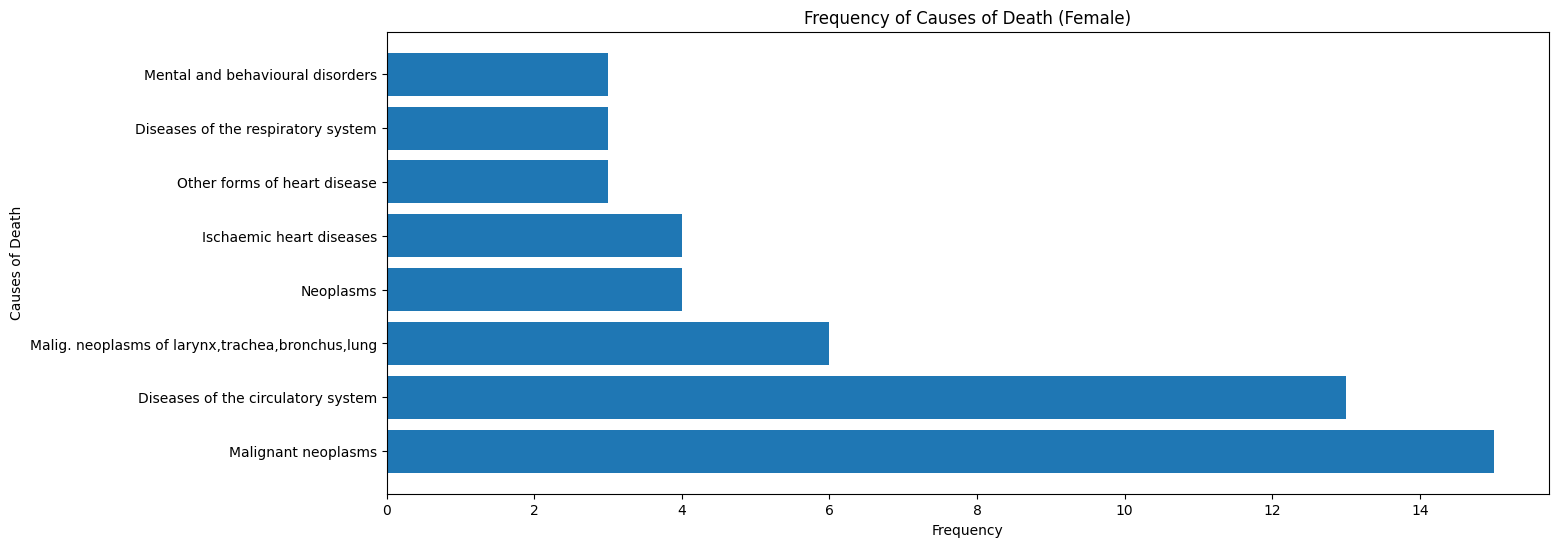

In [360]:
generate_morality_frequency_plot(female_top_three_causes, gender="Female")

**Key observations**
1. Malignant Neoplasms is the most common cause of death among females also, with a frequency surpassing 12.
2. Diseases of the Circulatory System is the second most common cause, with a frequency just below 10.
3. Respiratory System Diseases have relatively lower frequencies, as indicated by the bars for “Diseases of the Respiratory System.”
Neoplasms (Other Than Malignant): Apart from malignant neoplasms (cancer), there are other non-cancerous growths (neoplasms) that contribute to female mortality. These have frequencies around 4-5.
4. Mental and Behavioral Disorders has the lowest frequency, suggesting that mental health-related causes of death are less common.

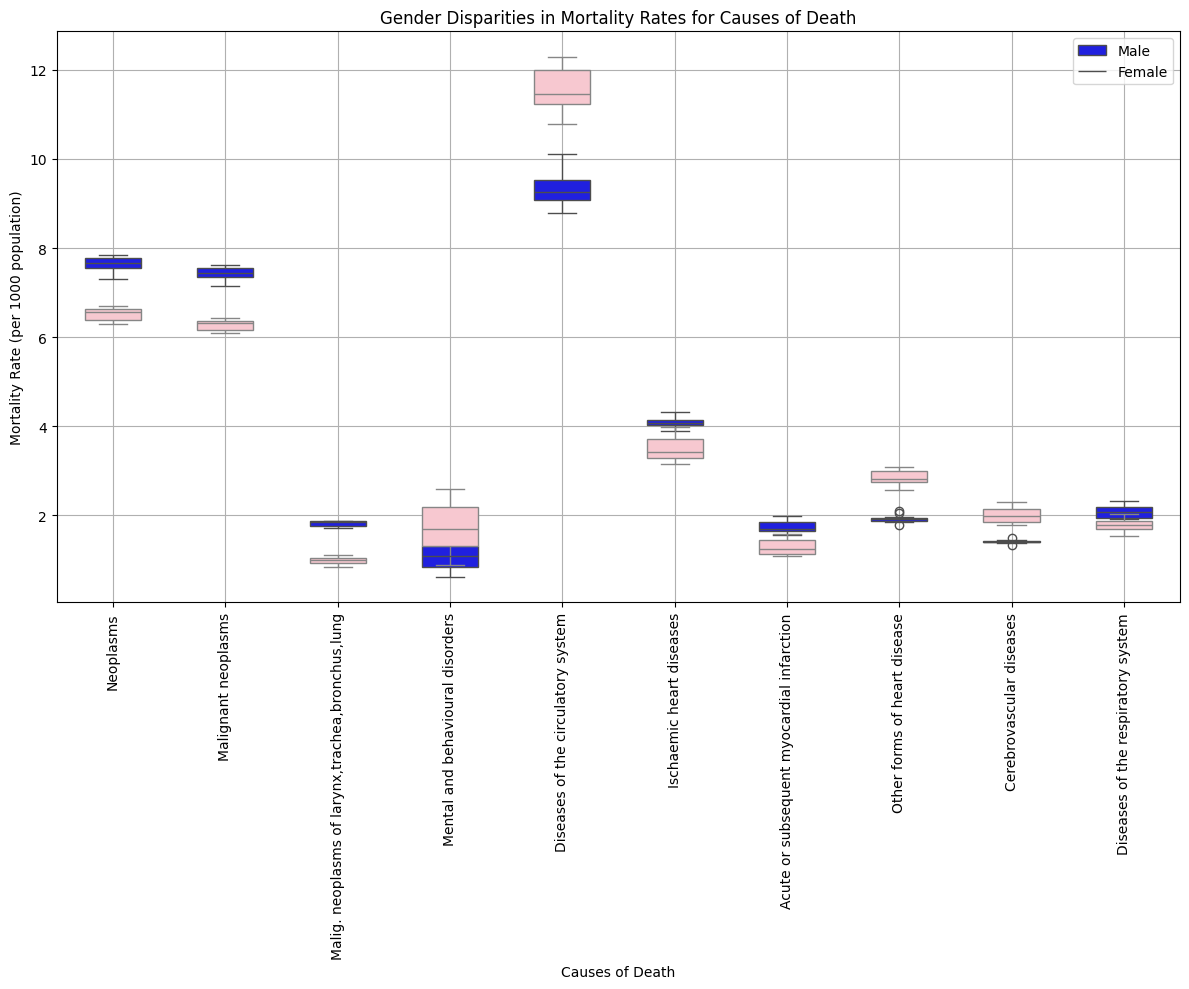

In [361]:
# Calculate mortality rates for each cause of death and gender
males, females = get_age_groups(data, gender_wise=True)

data_without_total = data[data['Causes of death'] != 'Total']

data_without_total['Total_Male'] = data_without_total[males].sum(axis=1)
data_without_total['Total_Female'] = data_without_total[females].sum(axis=1)

population_size = data_without_total['Total_Male'].sum() + data_without_total['Total_Female'].sum()

data_without_total['Mortality_Rate_Male'] = (data_without_total['Total_Male'] / population_size) * 1000
data_without_total['Mortality_Rate_Female'] = (data_without_total['Total_Female'] / population_size) * 1000

# Plot the mortality rates for each cause of death by gender
plt.figure(figsize=(12, 10))
sns.boxplot(x='Causes of death', y='Mortality_Rate_Male', data=data_without_total, color='blue', width=0.5)
sns.boxplot(x='Causes of death', y='Mortality_Rate_Female', data=data_without_total, color='pink', width=0.5)
plt.title('Gender Disparities in Mortality Rates for Causes of Death')
plt.xlabel('Causes of Death')
plt.ylabel('Mortality Rate (per 1000 population)')
plt.xticks(rotation=90)
plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.grid()
plt.show()

**Key observations**
1. For “Diseases of the circulatory system,” males have a higher median mortality rate compared to females.
2. In the case of “Mental and behavioural disorders,” males also exhibit a higher median mortality rate.
3. For “Diseases of the respiratory system,” there is a notable disparity, with males having a significantly higher median mortality rate.
4. Females have slightly higher median mortality rates for “Neoplasms” and “Other diseases.”
5. The interquartile range for males is generally wider, indicating more variability in male mortality rates for most causes of death.

### Question 4: Can we identify any significant trends or patterns in the causes of death based on gender and age groups over the years?

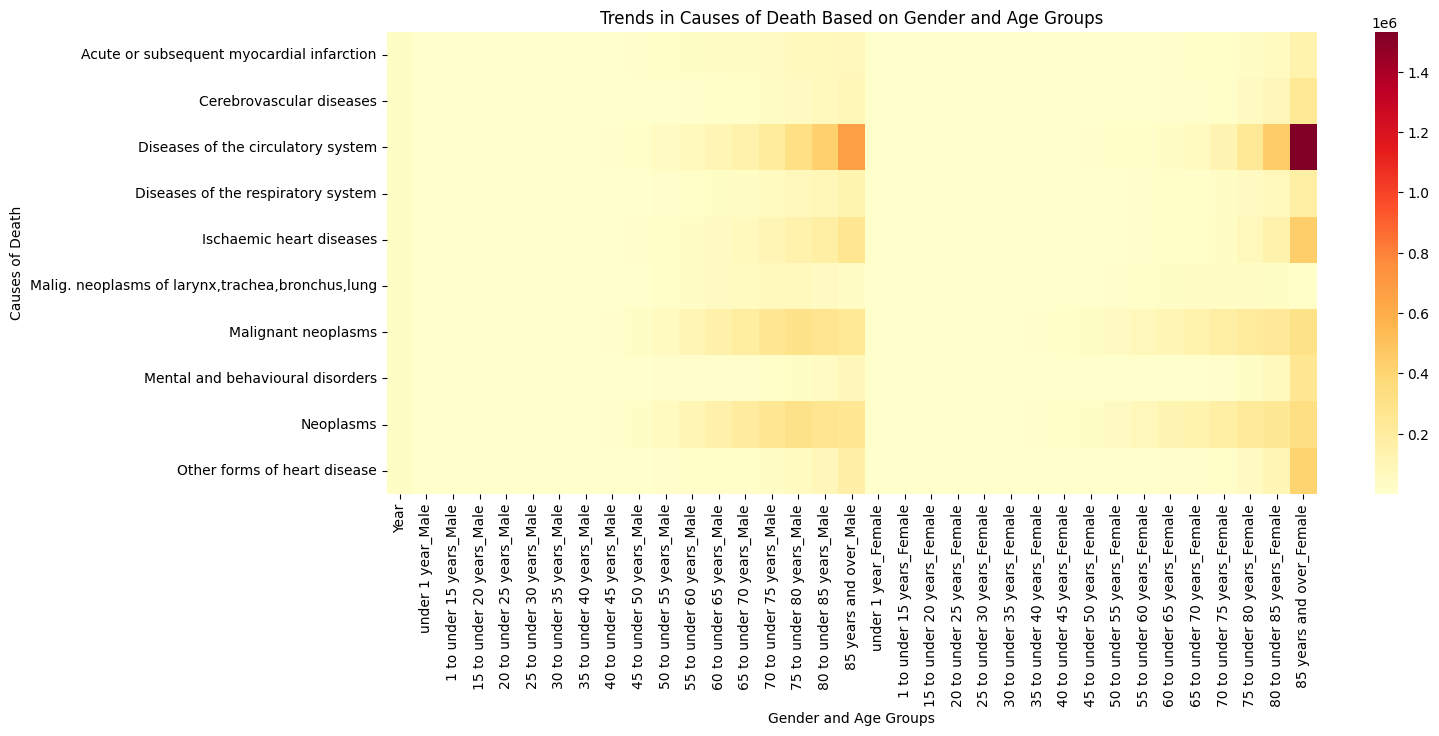

In [362]:
cause_of_death_totals = data.groupby('Causes of death').sum()

# Plot the causes of death based on gender and age groups over the years
sns.heatmap(cause_of_death_totals, cmap='YlOrRd')
plt.xlabel('Gender and Age Groups')
plt.ylabel('Causes of Death')
plt.title('Trends in Causes of Death Based on Gender and Age Groups')
plt.show()

**Key observations**
1. Ischaemic heart diseases appear to be the most prominent cause of death for both males and females in the age group of 70-74.
2. Acute or subsequent myocardial infarction is more prevalent in males aged 75-79.
3. Females in the age group of 85+ show a higher trend for Cerebrovascular diseases.
4. The heatmap indicates that Diseases of the circulatory system are common causes of death but are not as prominent as other specific diseases listed.
5. There is a noticeable absence of data or lower rates for most causes of death in younger age groups.

### Question 5: Is there any correlation between the number of deaths for different age groups and genders?

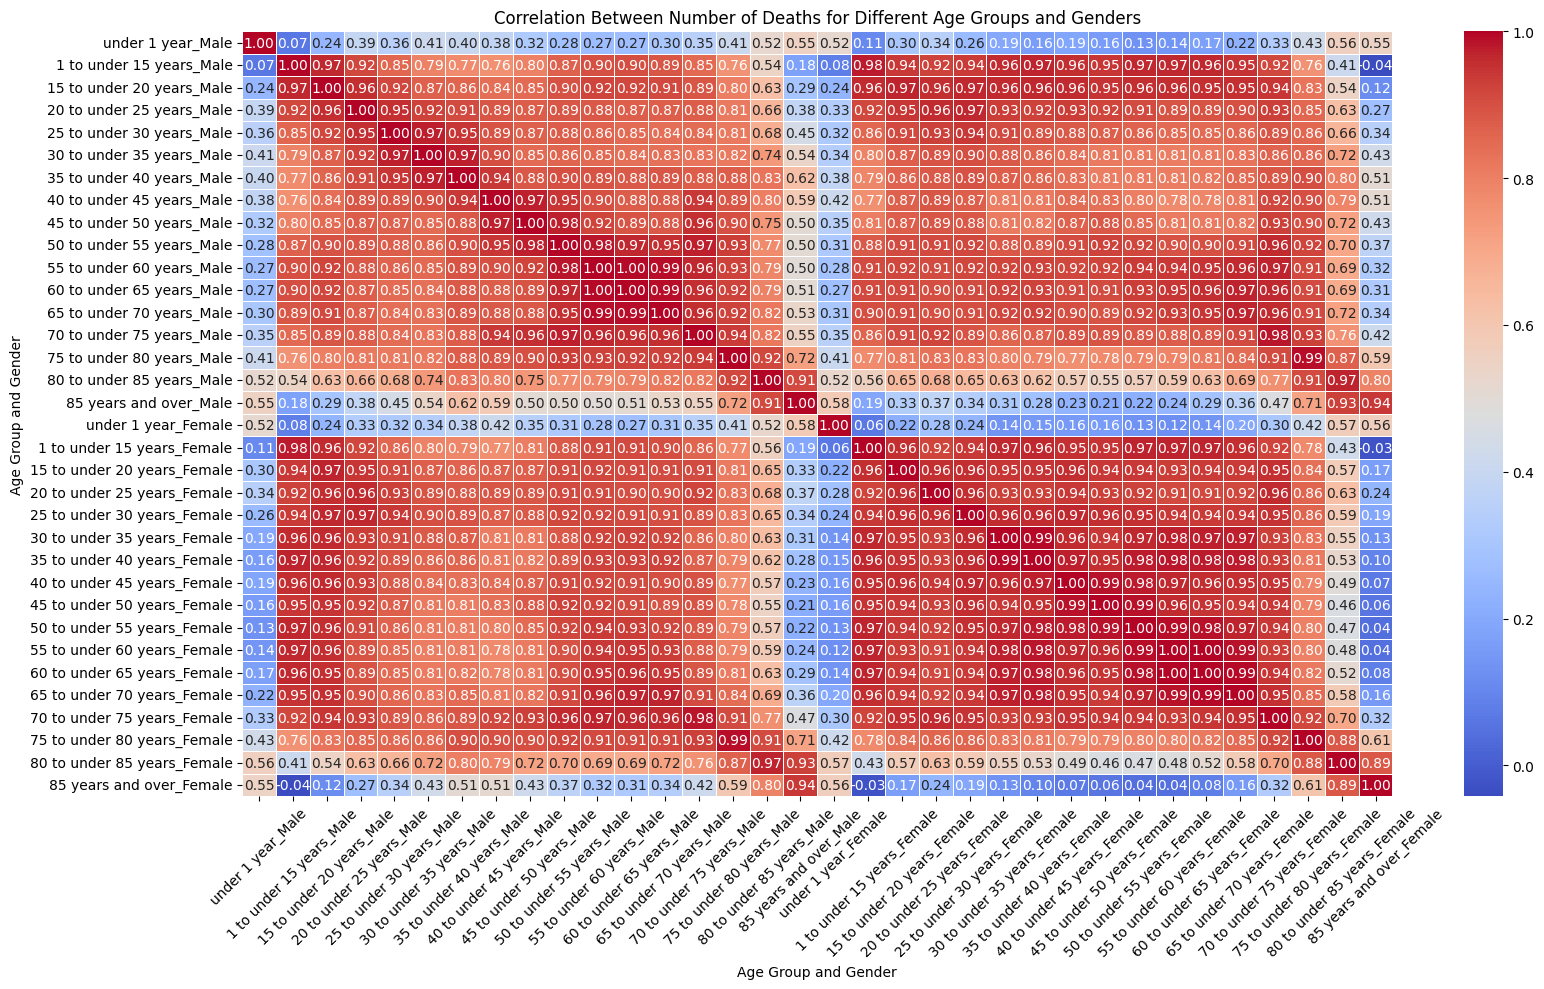

In [363]:
males, females = get_age_groups(data, gender_wise=True)
correlation_data = data[males+females]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Number of Deaths for Different Age Groups and Genders')
plt.xlabel('Age Group and Gender')
plt.ylabel('Age Group and Gender')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Key observations**
1. There is a strong positive correlation within the same age groups for both males and females. This indicates that the number of deaths in one gender tends to increase with the number of deaths in the other gender within the same age group.
2. The correlation between different age groups is weaker, suggesting that the number of deaths in one age group does not necessarily predict the number of deaths in another.
3. The correlations are generally stronger among adjacent or nearby age groups and weaken as the difference in ages increases. This could be due to similar risk factors or conditions affecting these age groups.
4. There are very few negative correlations which means there are very minimum age groups that have an inverse relationship in the number of deaths.

## Section 5: Summary and Conclusion

Based on the analysis of the dataset "CausesOfDeath," several key observations can be made. Firstly, the number of deaths for females aged 85 and above is significantly higher than the overall population, highlighting a vulnerability in this age group. Secondly, there is a gradual increase in the number of deaths for males over time, suggesting a concerning trend. Additionally, there was a notable dip in deaths in 2014, followed by a rise in deaths in 2020. 'Malignant neoplasms' and 'Diseases of the circulatory system' emerge as the most common causes of death among people. Notably, males exhibit a higher median mortality rate than females for "Mental and behavioral disorders." The heatmap indicates that diseases of the circulatory system, while common, are not as prominent as other specific diseases listed. Finally, a strong positive correlation is observed within the same age groups for both males and females, indicating an increase in deaths in one gender corresponding to an increase in deaths in the other gender within the same age group. These findings shed light on the trends and patterns in causes of death based on gender and age groups.

## Section 6: References:

The Datasets can be found at [Genesis, ]{https://www-genesis.destatis.de/genesis/online} a statistical data service provided by the German government. 

**Dataset used**:

Code: 23211

Content: Causes of death statistics

Deaths: Germany, years, causes of death, sex, age groups